### import packages

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import joblib

### import dataset

In [2]:
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### The prediction task is to determine whether a person makes over 50K a year
### this makes it a classification problem
### income column is our target variable rest are feautres

In [3]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (32560, 15)


In [4]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### check if missing values

In [6]:
for i in df.columns:
    if 0<len(df[df[i]=='?']):
        print(i)
        print(len(df[df[i]=='?']))

In [7]:
for i in df.columns:
    if 0<len(df[df[i]==' ?']):
        print(i)
        print(len(df[df[i]==' ?']))

Workclass
1836
Occupation
1843
Native_country
583


In [8]:
for i in df.columns:
    if 0<len(df[df[i]=='']):
        print(i)
        print(len(df[df[i]=='']))

In [9]:
for i in df.columns:
    if 0<len(df[df[i]==' ']):
        print(i)
        print(len(df[df[i]==' ']))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### from above we can conclude there are. workclass,education, Marital_status, occupation, relationship, race, sex, native country, income are categorical data. rest are numerical data having int as datatype.

### from analyzing above we also understood that there are unnecessary spaces which might hamper our analyzes so strip it

In [11]:
listy=['Workclass','Education','Native_country','Marital_status','Relationship','Occupation','Race','Sex','Native_country']
for j in listy:
    for i in range(len(df[j])):
        df[j][i]=df[j][i].strip()

### start analyzes and fill missing data

### missing data in workclass

In [12]:
df['Workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [13]:
df[df['Workclass']=='?']['Occupation'].value_counts()

?    1836
Name: Occupation, dtype: int64

In [14]:
df[df['Workclass']=='?']['Education'].value_counts()

HS-grad         532
Some-college    514
Bachelors       173
11th            118
10th            100
7th-8th          72
Assoc-voc        61
9th              51
Masters          48
Assoc-acdm       47
12th             40
5th-6th          30
Prof-school      18
Doctorate        15
1st-4th          12
Preschool         5
Name: Education, dtype: int64

In [15]:
for i in set(df[df['Workclass']=='?']['Education']):
    print(i)
    print(df[df['Education']==i]['Workclass'].value_counts()[:1])
    print('*'*10)

Assoc-voc
Private    1005
Name: Workclass, dtype: int64
**********
1st-4th
Private    136
Name: Workclass, dtype: int64
**********
Doctorate
Private    181
Name: Workclass, dtype: int64
**********
HS-grad
Private    7780
Name: Workclass, dtype: int64
**********
Masters
Private    894
Name: Workclass, dtype: int64
**********
Prof-school
Private    257
Name: Workclass, dtype: int64
**********
9th
Private    387
Name: Workclass, dtype: int64
**********
7th-8th
Private    424
Name: Workclass, dtype: int64
**********
Bachelors
Private    3551
Name: Workclass, dtype: int64
**********
Assoc-acdm
Private    729
Name: Workclass, dtype: int64
**********
Some-college
Private    5094
Name: Workclass, dtype: int64
**********
Preschool
Private    41
Name: Workclass, dtype: int64
**********
10th
Private    695
Name: Workclass, dtype: int64
**********
5th-6th
Private    266
Name: Workclass, dtype: int64
**********
12th
Private    333
Name: Workclass, dtype: int64
**********
11th
Private    923
Name: W

In [16]:
df[df['Workclass']!='?']['Workclass'].mode()[0]

'Private'

### from above analyzes we will fill missing values of Workclass column with Private

In [17]:
fill=df[df['Workclass']!='?']['Workclass'].mode()[0]
for i in range(len(df['Workclass'])):
    if df['Workclass'][i]=='?':
        df['Workclass'][i]=fill

### missing data of workclass is now filled 
### start analyzes and fill missing data of occupation

In [18]:
df['Occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [19]:
df[df['Occupation']=='?']['Workclass'].value_counts()

Private         1836
Never-worked       7
Name: Workclass, dtype: int64

In [20]:
df[df['Workclass']=='Never-worked']['Occupation'].value_counts()

?    7
Name: Occupation, dtype: int64

### if the person has never worked then he does not has an occupation 
### hence for workclass as never worked we create new occupation as nothing

In [21]:
for i in range(len(df['Workclass'])):
    if df['Workclass'][i]=='Never-worked':
        df['Occupation'][i]='NO'

In [22]:
df[df['Occupation']=='?']['Workclass'].value_counts()

Private    1836
Name: Workclass, dtype: int64

In [23]:
dicty={}
for i in set(df[df['Occupation']=='?']['Education']):
    print(i)
    print('-'*3)
    print(df[df['Education']==i]['Occupation'].value_counts()[:1])
    print('*'*10)
    dicty[i]=str(df[df['Education']==i]['Occupation'].value_counts()[:1]).split()[0]

Assoc-voc
---
Craft-repair    252
Name: Occupation, dtype: int64
**********
1st-4th
---
Other-service    40
Name: Occupation, dtype: int64
**********
Doctorate
---
Prof-specialty    321
Name: Occupation, dtype: int64
**********
HS-grad
---
Craft-repair    1922
Name: Occupation, dtype: int64
**********
Masters
---
Prof-specialty    844
Name: Occupation, dtype: int64
**********
Prof-school
---
Prof-specialty    452
Name: Occupation, dtype: int64
**********
9th
---
Other-service    101
Name: Occupation, dtype: int64
**********
7th-8th
---
Craft-repair    116
Name: Occupation, dtype: int64
**********
Bachelors
---
Prof-specialty    1495
Name: Occupation, dtype: int64
**********
Assoc-acdm
---
Adm-clerical    193
Name: Occupation, dtype: int64
**********
Some-college
---
Adm-clerical    1281
Name: Occupation, dtype: int64
**********
Preschool
---
Other-service    15
Name: Occupation, dtype: int64
**********
10th
---
Other-service    194
Name: Occupation, dtype: int64
**********
5th-6th
---


In [24]:
dicty

{'Assoc-voc': 'Craft-repair',
 '1st-4th': 'Other-service',
 'Doctorate': 'Prof-specialty',
 'HS-grad': 'Craft-repair',
 'Masters': 'Prof-specialty',
 'Prof-school': 'Prof-specialty',
 '9th': 'Other-service',
 '7th-8th': 'Craft-repair',
 'Bachelors': 'Prof-specialty',
 'Assoc-acdm': 'Adm-clerical',
 'Some-college': 'Adm-clerical',
 'Preschool': 'Other-service',
 '10th': 'Other-service',
 '5th-6th': 'Other-service',
 '12th': 'Other-service',
 '11th': 'Other-service'}

In [25]:
for i in range(len(df['Occupation'])):
    if df['Occupation'][i]=='?':
        df['Occupation'][i]=dicty[df['Education'][i]]

In [26]:
df[df['Occupation']=='?'].value_counts()

Series([], dtype: int64)

### occupation column missing data is filled
### start analyzes and fill missing data of native_country

In [27]:
df['Native_country'].value_counts()

United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [28]:
df[df['Native_country']=='?']['Education'].value_counts()

Bachelors       145
HS-grad         133
Some-college    104
Masters          49
Doctorate        23
7th-8th          19
Prof-school      17
12th             16
Assoc-voc        16
5th-6th          15
10th             12
Assoc-acdm       12
9th               8
11th              8
1st-4th           5
Preschool         1
Name: Education, dtype: int64

In [29]:
dicty={}
for i in set(df[df['Native_country']=='?']['Education']):
    print(i)
    print('-'*3)
    print(df[df['Education']==i]['Native_country'].value_counts()[:1])
    print('*'*10)
    dicty[i]=str(df[df['Education']==i]['Native_country'].value_counts()[:1]).split()[0]

Assoc-voc
---
United-States    1289
Name: Native_country, dtype: int64
**********
1st-4th
---
Mexico    64
Name: Native_country, dtype: int64
**********
Doctorate
---
United-States    328
Name: Native_country, dtype: int64
**********
HS-grad
---
United-States    9702
Name: Native_country, dtype: int64
**********
Masters
---
United-States    1527
Name: Native_country, dtype: int64
**********
Prof-school
---
United-States    502
Name: Native_country, dtype: int64
**********
9th
---
United-States    395
Name: Native_country, dtype: int64
**********
7th-8th
---
United-States    499
Name: Native_country, dtype: int64
**********
Bachelors
---
United-States    4765
Name: Native_country, dtype: int64
**********
Preschool
---
United-States    17
Name: Native_country, dtype: int64
**********
Some-college
---
United-States    6740
Name: Native_country, dtype: int64
**********
10th
---
United-States    848
Name: Native_country, dtype: int64
**********
Assoc-acdm
---
United-States    982
Name: Nati

In [30]:
dicty

{'Assoc-voc': 'United-States',
 '1st-4th': 'Mexico',
 'Doctorate': 'United-States',
 'HS-grad': 'United-States',
 'Masters': 'United-States',
 'Prof-school': 'United-States',
 '9th': 'United-States',
 '7th-8th': 'United-States',
 'Bachelors': 'United-States',
 'Preschool': 'United-States',
 'Some-college': 'United-States',
 '10th': 'United-States',
 'Assoc-acdm': 'United-States',
 '5th-6th': 'Mexico',
 '12th': 'United-States',
 '11th': 'United-States'}

In [31]:
for i in range(len(df['Native_country'])):
    if df['Native_country'][i]=='?':
        df['Native_country'][i]=dicty[df['Education'][i]]

### all missing values filled. check dataset again

In [32]:
for i in df.columns:
    if 0<len(df[df[i]=='?']):
        print(i)
        print(len(df[df[i]=='?']))

### no missing data

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [34]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### conv categorical data into numerical data

In [35]:
dicty={}
for i in df[['Workclass']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Workclass': {'Self-emp-not-inc': 0,
  'Private': 1,
  'State-gov': 2,
  'Federal-gov': 3,
  'Local-gov': 4,
  'Self-emp-inc': 5,
  'Without-pay': 6,
  'Never-worked': 7}}

In [36]:
for i in ['Workclass']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [37]:
dicty={}
for i in df[['Education']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Education': {'Bachelors': 0,
  'HS-grad': 1,
  '11th': 2,
  'Masters': 3,
  '9th': 4,
  'Some-college': 5,
  'Assoc-acdm': 6,
  'Assoc-voc': 7,
  '7th-8th': 8,
  'Doctorate': 9,
  'Prof-school': 10,
  '5th-6th': 11,
  '10th': 12,
  '1st-4th': 13,
  'Preschool': 14,
  '12th': 15}}

In [38]:
for i in ['Education']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [39]:
dicty={}
for i in df[['Marital_status']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Marital_status': {'Married-civ-spouse': 0,
  'Divorced': 1,
  'Married-spouse-absent': 2,
  'Never-married': 3,
  'Separated': 4,
  'Married-AF-spouse': 5,
  'Widowed': 6}}

### merge all the married as same category. divorced and seperated are almost same hence merge

In [40]:
dicty['Marital_status']['Married-spouse-absent']=dicty['Marital_status']['Married-civ-spouse']
dicty['Marital_status']['Married-AF-spouse']=dicty['Marital_status']['Married-civ-spouse']
dicty['Marital_status']['Separated']=dicty['Marital_status']['Divorced']
dicty['Marital_status']['Widowed']=2
dicty

{'Marital_status': {'Married-civ-spouse': 0,
  'Divorced': 1,
  'Married-spouse-absent': 0,
  'Never-married': 3,
  'Separated': 1,
  'Married-AF-spouse': 0,
  'Widowed': 2}}

In [41]:
for i in ['Marital_status']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [42]:
dicty={}
for i in df[['Occupation']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Occupation': {'Exec-managerial': 0,
  'Handlers-cleaners': 1,
  'Prof-specialty': 2,
  'Other-service': 3,
  'Adm-clerical': 4,
  'Sales': 5,
  'Craft-repair': 6,
  'Transport-moving': 7,
  'Farming-fishing': 8,
  'Machine-op-inspct': 9,
  'Tech-support': 10,
  'Protective-serv': 11,
  'Armed-Forces': 12,
  'Priv-house-serv': 13,
  'NO': 14}}

In [43]:
for i in ['Occupation']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [44]:
dicty={}
for i in df[['Relationship']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Relationship': {'Husband': 0,
  'Not-in-family': 1,
  'Wife': 2,
  'Own-child': 3,
  'Unmarried': 4,
  'Other-relative': 5}}

In [45]:
for i in ['Relationship']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [46]:
dicty={}
for i in df[['Race']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Race': {'White': 0,
  'Black': 1,
  'Asian-Pac-Islander': 2,
  'Amer-Indian-Eskimo': 3,
  'Other': 4}}

In [47]:
for i in ['Race']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [48]:
dicty={}
for i in df[['Sex']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Sex': {'Male': 0, 'Female': 1}}

In [49]:
for i in ['Sex']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [50]:
dicty={}
for i in df[['Native_country']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Native_country': {'United-States': 0,
  'Cuba': 1,
  'Jamaica': 2,
  'India': 3,
  'Mexico': 4,
  'South': 5,
  'Puerto-Rico': 6,
  'Honduras': 7,
  'England': 8,
  'Canada': 9,
  'Germany': 10,
  'Iran': 11,
  'Philippines': 12,
  'Italy': 13,
  'Poland': 14,
  'Columbia': 15,
  'Cambodia': 16,
  'Thailand': 17,
  'Ecuador': 18,
  'Laos': 19,
  'Taiwan': 20,
  'Haiti': 21,
  'Portugal': 22,
  'Dominican-Republic': 23,
  'El-Salvador': 24,
  'France': 25,
  'Guatemala': 26,
  'China': 27,
  'Japan': 28,
  'Yugoslavia': 29,
  'Peru': 30,
  'Outlying-US(Guam-USVI-etc)': 31,
  'Scotland': 32,
  'Trinadad&Tobago': 33,
  'Greece': 34,
  'Nicaragua': 35,
  'Vietnam': 36,
  'Hong': 37,
  'Ireland': 38,
  'Hungary': 39,
  'Holand-Netherlands': 40}}

In [51]:
for i in ['Native_country']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [52]:
dicty={}
for i in df[['Income']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'Income': {' <=50K': 0, ' >50K': 1}}

In [53]:
for i in ['Income']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

### all categorical columns are now converted to numerical columns. income more than 50k is 1

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int64
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int64
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int64
 6   Occupation      32560 non-null  int64
 7   Relationship    32560 non-null  int64
 8   Race            32560 non-null  int64
 9   Sex             32560 non-null  int64
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int64
 14  Income          32560 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [55]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,0,83311,0,13,0,0,0,0,0,0,0,13,0,0
1,38,1,215646,1,9,1,1,1,0,0,0,0,40,0,0
2,53,1,234721,2,7,0,1,0,1,0,0,0,40,0,0
3,28,1,338409,0,13,0,2,2,1,1,0,0,40,1,0
4,37,1,284582,3,14,0,0,2,0,1,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1,257302,6,12,0,10,2,0,1,0,0,38,0,0
32556,40,1,154374,1,9,0,9,0,0,0,0,0,40,0,1
32557,58,1,151910,1,9,2,4,4,0,1,0,0,40,0,0
32558,22,1,201490,1,9,3,4,3,0,0,0,0,20,0,0


### now use describe func and analyze dataset

In [56]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.354146,1.897818e+05,3.424570,10.080590,1.213145,4.329730,1.392291,0.221714,0.330805,1077.615172,87.306511,40.437469,1.143428,0.240817
std,13.640642,1.120649,1.055498e+05,3.453582,2.572709,1.330752,2.914994,1.535159,0.627357,0.470510,7385.402999,402.966116,12.347618,4.817873,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,1.178315e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.000000,1.783630e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,1.000000,2.370545e+05,5.000000,12.000000,3.000000,6.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,3.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


### check data imbalancement and balance if required

In [57]:
print('Number of salary less than equal to 50k are:',df['Income'].value_counts()[0])
print('Number of salary more than 50k are:',df['Income'].value_counts()[1])
print('Unbalanced dataset' if df['Income'].value_counts()[0]!=df['Income'].value_counts()[1] else 'Balanced dataset')

Number of salary less than equal to 50k are: 24719
Number of salary more than 50k are: 7841
Unbalanced dataset


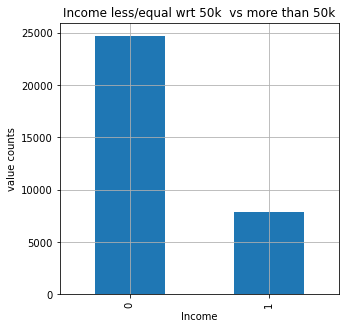

In [58]:
plt.figure(figsize=[5,5])
df['Income'].value_counts().plot(kind='bar')
plt.xlabel("Income")
plt.ylabel('value counts')
plt.title('Income less/equal wrt 50k  vs more than 50k')
plt.grid()

In [59]:
dfmin=df[df['Income']==1]
dfmax=df[df['Income']==0]
dfminup=resample(dfmin,replace=True,n_samples=24719,random_state=123)
dff=pd.concat([dfmax, dfminup])
print('Number of salary less than equal to 50k are:',dff['Income'].value_counts()[0])
print('Number of salary more than 50k are:',dff['Income'].value_counts()[1])
print('Unbalanced dataset' if dff['Income'].value_counts()[0]!=dff['Income'].value_counts()[1] else 'Balanced dataset')

Number of salary less than equal to 50k are: 24719
Number of salary more than 50k are: 24719
Balanced dataset


### start analyzing to find correlation and the columns to drop

In [60]:
dff.corr()['Income']

Age               0.289057
Workclass         0.126142
Fnlwgt           -0.008812
Education        -0.057241
Education_num     0.386683
Marital_status   -0.495214
Occupation       -0.163636
Relationship     -0.431369
Race             -0.084025
Sex              -0.269534
Capital_gain      0.183494
Capital_loss      0.154448
Hours_per_week    0.272950
Native_country   -0.032132
Income            1.000000
Name: Income, dtype: float64

### drop column fnlwgt as it has very low correlation

In [61]:
dff=dff.drop(['Fnlwgt'],axis=1)

### use heatmap to check correlation on dataset

<AxesSubplot:>

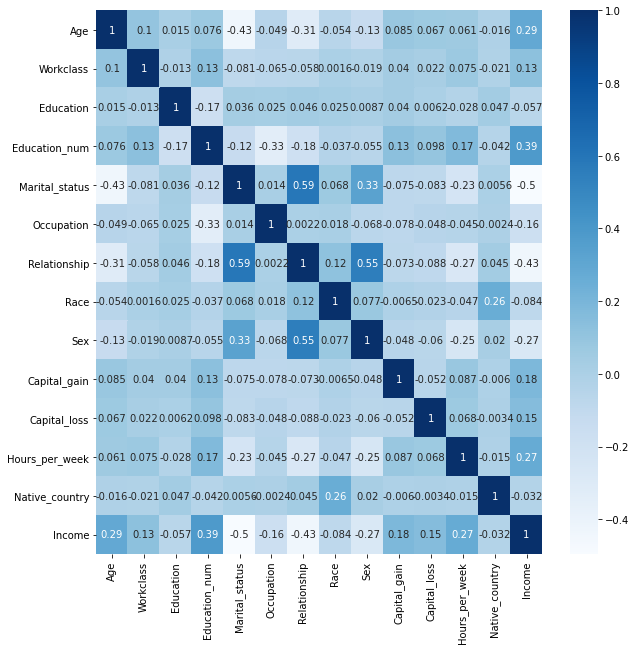

In [62]:
plt.figure(figsize=[10,10])
sn.heatmap(dff.corr(),annot=True,cmap='Blues')

### check the graphical relation between income column and rest

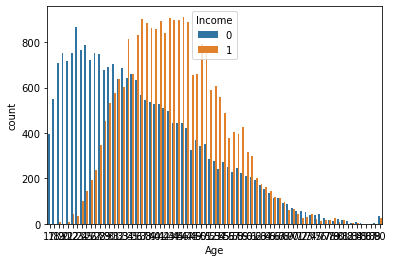

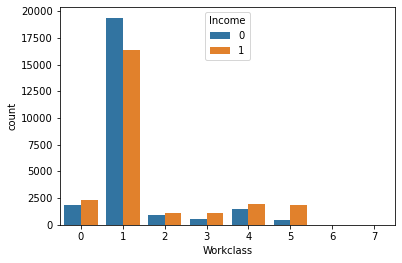

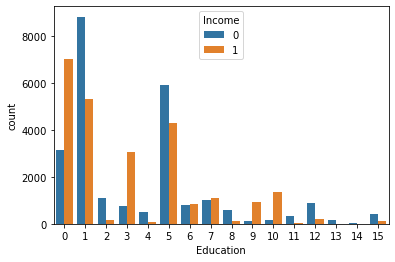

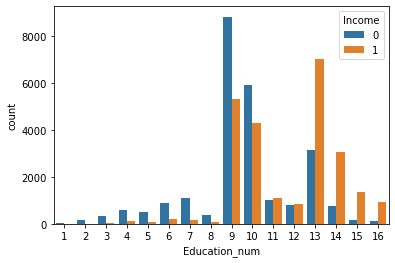

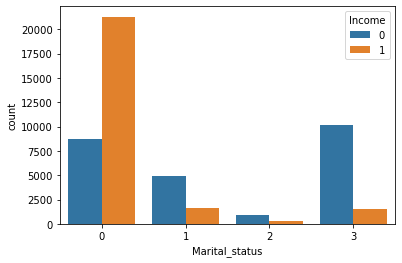

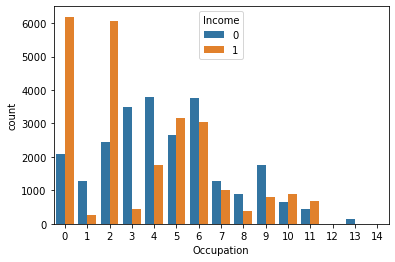

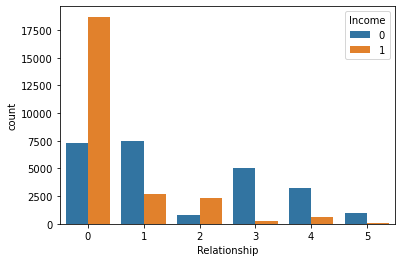

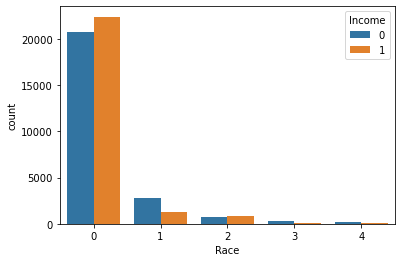

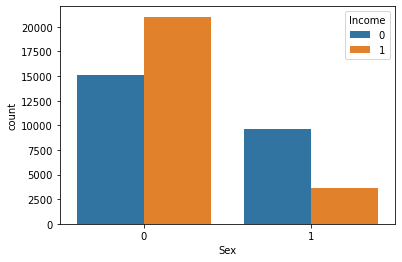

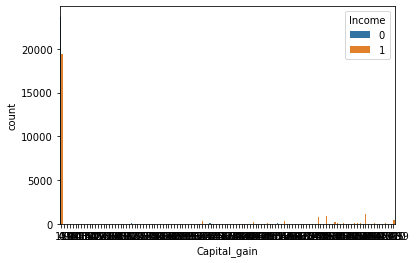

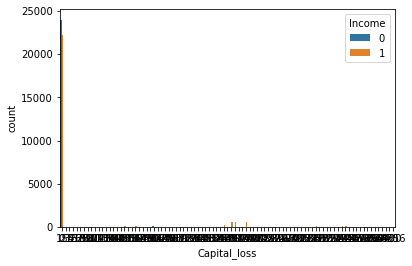

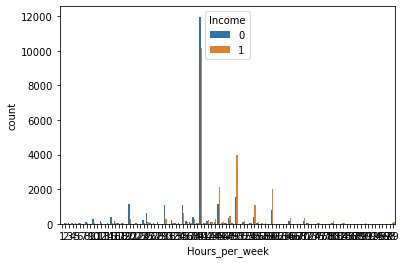

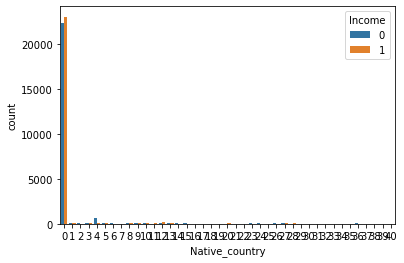

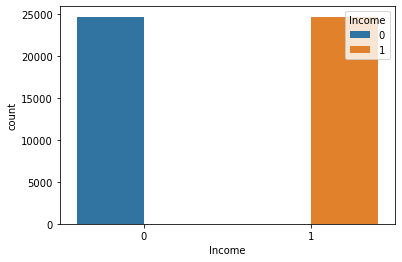

In [63]:
for i in dff.columns:
    sn.countplot(x=i,hue="Income",data=dff)
    plt.show()

### Acc to above plot race column is unable to distinguish between income more or less than 50k. Meaning it does not provide much impact to the model. drop column

In [64]:
dff=dff.drop(['Race'],axis=1)

### check dist plots of all columns

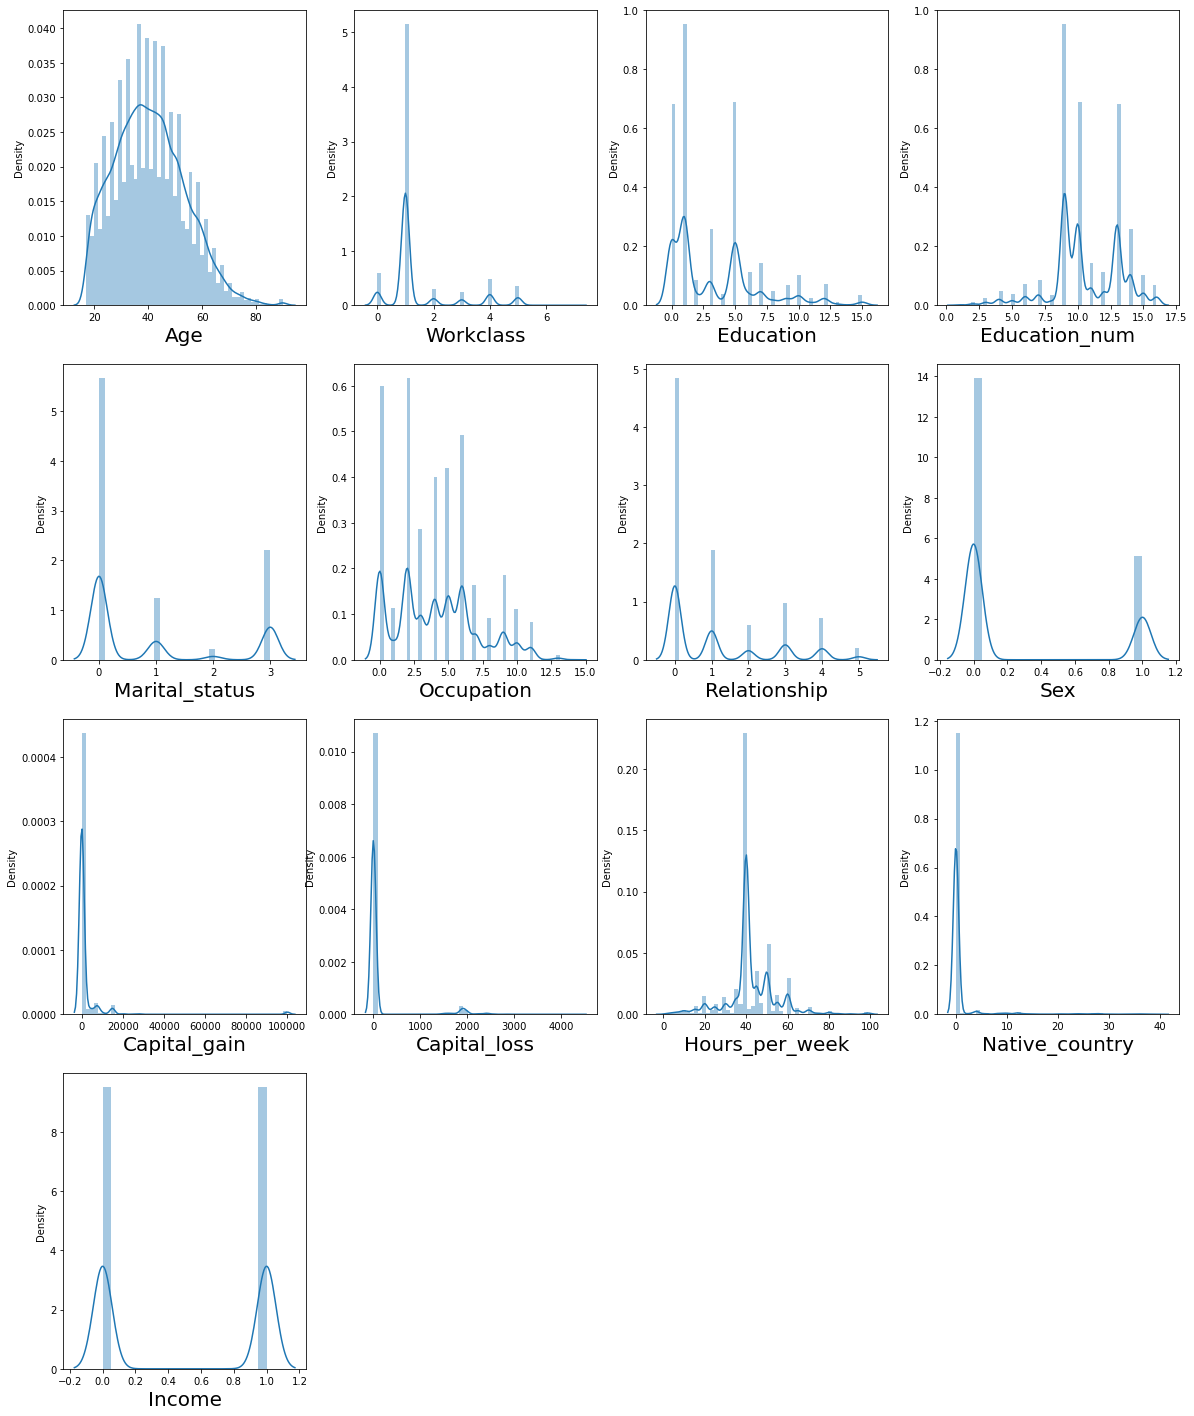

In [65]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in dff.columns:
    if plotnumber<=len(dff.columns):
        ax=plt.subplot(4,4,plotnumber)
        sn.distplot(dff[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### columns having normal distribution plot: native_country (categorical data), capital_loss (positively skewed), capital_gain (positively skewed), Age
### rest all columns have bimodal distribution plot
### check for outliers

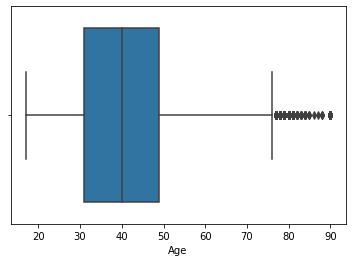

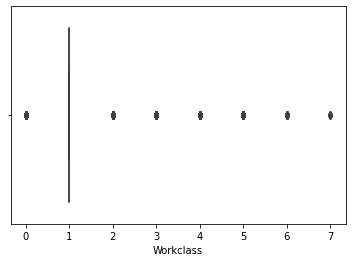

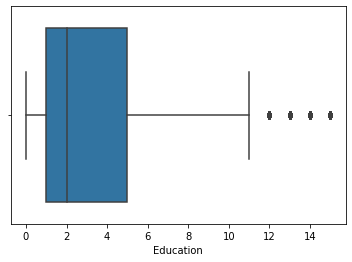

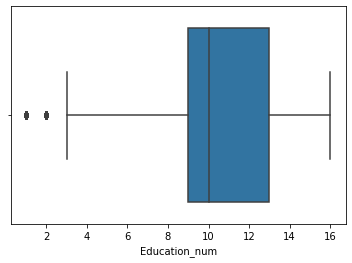

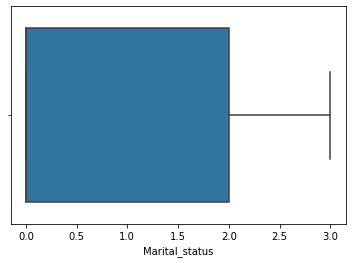

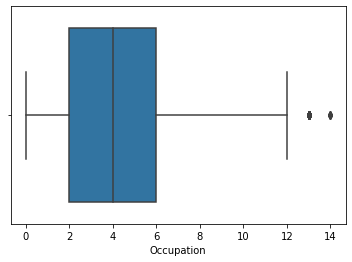

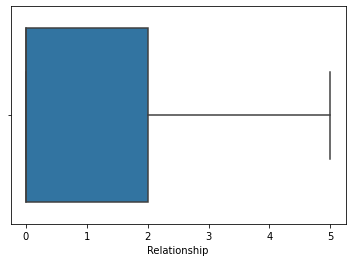

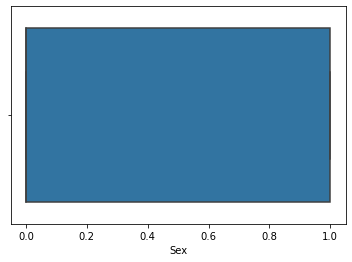

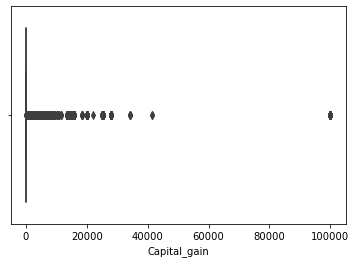

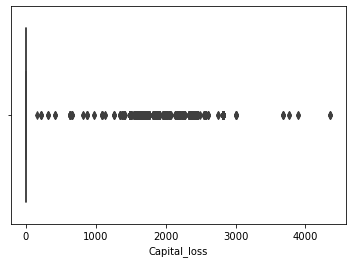

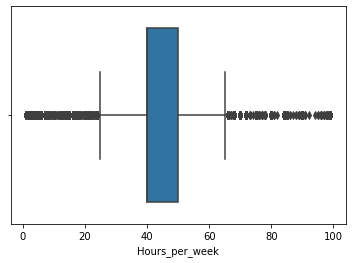

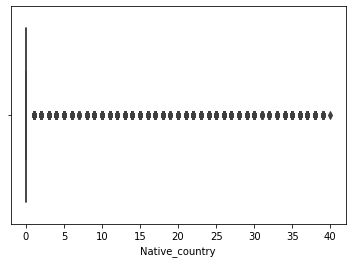

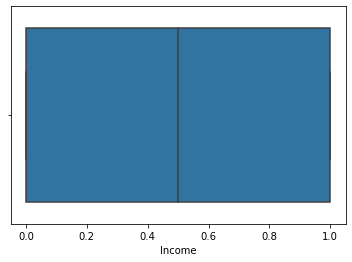

In [66]:
for i in dff.columns:
    sn.boxplot(dff[i])
    plt.show()

### apart from the categorical columns. outliers do lie in capital gain and capital loss
### try to reduce some of it

In [67]:
z_scr=zscore(dff)
print(dff.shape)
df_new=dff.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(49438, 13)
(43298, 13)


### cant remove outliers as data loss is more than 10%

In [68]:
y = dff[['Income']]
x = dff.drop(columns = ['Income'])

### check for bias and remove if possible

In [69]:
print(x.skew())

Age               0.390765
Workclass         1.803347
Education         1.155032
Education_num    -0.317976
Marital_status    0.932268
Occupation        0.457972
Relationship      1.166000
Sex               1.044303
Capital_gain      8.385728
Capital_loss      3.652833
Hours_per_week    0.285011
Native_country    5.280913
dtype: float64


In [70]:
print(len(x.skew().loc[x.skew()>0.55]))

8


In [71]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [72]:
#lets again check the skewness
print(x.skew())
print()
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55 

Age               0.390765
Workclass        -1.052537
Education        -0.470810
Education_num    -0.317976
Marital_status    0.550254
Occupation        0.457972
Relationship      0.311038
Sex               1.044303
Capital_gain      3.040787
Capital_loss      3.497646
Hours_per_week    0.285011
Native_country    3.531686
dtype: float64

5


### Find the best features using Univariate Selection

In [73]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

             Specs         Score
8     Capital_gain  85651.935144
0              Age  17059.627679
10  Hours_per_week  13030.143270
9     Capital_loss  12934.504718
4   Marital_status  11078.734222
6     Relationship   7859.760973
3    Education_num   4746.905944
5       Occupation   2929.988188
7              Sex   2626.964603
2        Education    336.994503


### use the top 10 features obtained from above
### lets do feature scaling on non categorical values only

In [74]:
newdf=x[['Capital_gain','Age','Hours_per_week','Capital_loss','Marital_status','Relationship','Education_num',
         'Occupation','Sex','Education']]
newdf['Income']=y
newdf

,Capital_gain,Age,Hours_per_week,Capital_loss,Marital_status,Relationship,Education_num,Occupation,Sex,Education,Income
0,0.000000,50,13,0.0,0.00000,0.000000,13,0,0.0,0.000000,0
1,0.000000,38,40,0.0,1.00000,1.000000,9,1,0.0,1.000000,0
2,0.000000,53,40,0.0,0.00000,0.000000,7,1,0.0,1.259921,0
3,0.000000,28,40,0.0,0.00000,1.259921,13,2,1.0,0.000000,0
4,0.000000,37,40,0.0,0.00000,1.259921,14,0,1.0,1.442250,0
...,...,...,...,...,...,...,...,...,...,...,...
3699,0.000000,53,60,0.0,0.00000,0.000000,10,0,0.0,1.709976,1
18063,0.000000,31,50,0.0,0.00000,1.259921,13,0,1.0,0.000000,1
28086,24.675267,41,40,0.0,0.00000,0.000000,15,0,0.0,2.154435,1
6034,46.415734,78,20,0.0,1.44225,1.000000,13,0,0.0,0.000000,1


In [75]:
scaler = StandardScaler()
newdf[['Capital_gain','Capital_loss']] = scaler.fit_transform(newdf[['Capital_gain','Capital_loss']])
newdf.reset_index(inplace=True)
newdf

,index,Capital_gain,Age,Hours_per_week,Capital_loss,Marital_status,Relationship,Education_num,Occupation,Sex,Education,Income
0,0,-0.356646,50,13,-0.266622,0.00000,0.000000,13,0,0.0,0.000000,0
1,1,-0.356646,38,40,-0.266622,1.00000,1.000000,9,1,0.0,1.000000,0
2,2,-0.356646,53,40,-0.266622,0.00000,0.000000,7,1,0.0,1.259921,0
3,3,-0.356646,28,40,-0.266622,0.00000,1.259921,13,2,1.0,0.000000,0
4,4,-0.356646,37,40,-0.266622,0.00000,1.259921,14,0,1.0,1.442250,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49433,3699,-0.356646,53,60,-0.266622,0.00000,0.000000,10,0,0.0,1.709976,1
49434,18063,-0.356646,31,50,-0.266622,0.00000,1.259921,13,0,1.0,0.000000,1
49435,28086,2.759440,41,40,-0.266622,0.00000,0.000000,15,0,0.0,2.154435,1
49436,6034,5.504907,78,20,-0.266622,1.44225,1.000000,13,0,0.0,0.000000,1


### instead of finding the best models using whole dataset which will be very computational heavy and would take alot of time to find best hyperparameters, it will be better to take 30% randomly sampled dataset. using this randomly sampled dataset build and find best model and then its best hyperparameters. and then build that model on the whole dataset
### randomly sample dataset to 30%

In [76]:
n=49438
s=14829
skip = sorted(random.sample(range(1, n), n-s))  # n+1 to compensate for header
sampledf=newdf.copy()
sampledf.drop(skip,axis=0,inplace=True)
sampledf

,index,Capital_gain,Age,Hours_per_week,Capital_loss,Marital_status,Relationship,Education_num,Occupation,Sex,Education,Income
0,0,-0.356646,50,13,-0.266622,0.00000,0.000000,13,0,0.0,0.000000,0
4,4,-0.356646,37,40,-0.266622,0.00000,1.259921,14,0,1.0,1.442250,0
8,14,-0.356646,34,45,-0.266622,0.00000,0.000000,4,7,0.0,2.000000,0
10,16,-0.356646,32,40,-0.266622,1.44225,1.587401,9,9,0.0,1.000000,0
16,25,-0.356646,19,40,-0.266622,1.44225,1.442250,9,6,0.0,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49426,2251,-0.356646,44,55,-0.266622,0.00000,0.000000,16,4,0.0,2.080084,1
49427,22612,-0.356646,39,50,-0.266622,1.44225,1.000000,14,0,0.0,1.442250,1
49432,6940,-0.356646,46,40,-0.266622,0.00000,0.000000,14,0,0.0,1.442250,1
49434,18063,-0.356646,31,50,-0.266622,0.00000,1.259921,13,0,1.0,0.000000,1


In [77]:
y = sampledf[['Income']]
x = sampledf.drop(columns = ['Income'])

### algo to find best train test random split

In [78]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        tmp=roc_auc_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum roc_auc_score is at random state :",random," and it is :",score)

### All models we are going to use to iterate and find the best model

In [79]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),
       LGBMClassifier(),XGBClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),
       QuadraticDiscriminantAnalysis(),CalibratedClassifierCV(),LinearSVC(),NuSVC(),
       LinearDiscriminantAnalysis(),RidgeClassifierCV(),GaussianNB(),BernoulliNB(),
        PassiveAggressiveClassifier(),Perceptron(),DummyClassifier()]

In [80]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.20,stratify=y)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if roc_auc_score(y_test,y_pred)>score:
        diff=roc_auc_score(y_test,y_pred)-score
        print('roc bigger')
    else:
        diff=score-roc_auc_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('roc',roc_auc_score(y_test,y_pred))
    print('diff',diff)

**********
LogisticRegression()
score 0.8736572588967103
roc 0.7769421952071238
diff 0.09671506368958649
roc bigger
**********
DecisionTreeClassifier()
score 0.8222323044497287
roc 0.8392653178517905
diff 0.01703301340206176
**********
KNeighborsClassifier()
score 0.6616125523888707
roc 0.6421220917543323
diff 0.01949046063453841
**********
RandomForestClassifier()
score 0.9374361462964425
roc 0.863572540631775
diff 0.07386360566466743
roc bigger
**********
SVC()
score 0.49423805457664993
roc 0.5024353601932283
diff 0.008197305616578388
**********
RidgeClassifier()
score 0.8885082845801644
roc 0.7952010308903342
diff 0.09330725368983017
**********
BaggingClassifier()
score 0.9220604004675188
roc 0.8537187895586889
diff 0.06834161090882995
**********
GradientBoostingClassifier()
score 0.924285001358246
roc 0.827461368894321
diff 0.096823632463925
**********
SGDClassifier()
score 0.5405504616167797
roc 0.5137182257337
diff 0.026832235883079703
**********
LGBMClassifier()
score 0.93313696

### from above we can conclude that XGBClassifier & RandomForestClassifier are the best model without any issues of underfitting or overfitting
### fine tune the models

In [81]:
parameters={
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1],
    'eval_metric':['auc','logloss','error']
}
clf = RandomizedSearchCV(XGBClassifier(), parameters, cv=10,scoring="roc_auc",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished


{'reg_lambda': 1,
 'reg_alpha': 0.5,
 'n_estimators': 100,
 'learning_rate': 0.05,
 'eval_metric': 'error',
 'booster': 'gbtree',
 'base_score': 0.2}

In [82]:
parameters={'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
            'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)]}
clf = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=10,scoring="roc_auc",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.6min finished


{'n_estimators': 1400,
 'max_features': 'auto',
 'max_depth': 60,
 'criterion': 'entropy'}

### find best random state

In [83]:
besttrain(XGBClassifier(reg_lambda=1,reg_alpha=0.5,n_estimators=100,learning_rate=0.05,eval_metric='error',
                        booster='gbtree',base_score=0.2),x,y)

maximum roc_auc_score is at random state : 64  and it is : 0.8632046902963901


In [84]:
besttrain(RandomForestClassifier(n_estimators=1400,max_depth=60,criterion='entropy',max_features='auto'),x,y)

maximum roc_auc_score is at random state : 64  and it is : 0.8844536172101212


### best random state is 64
### build model, train it & test it

### run xgb model first

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 64,test_size=0.20,stratify=y)
model=XGBClassifier(reg_lambda=1,reg_alpha=0.5,n_estimators=100,learning_rate=0.05,eval_metric='error',
                        booster='gbtree',base_score=0.2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

### check all the metrics of the model

In [86]:
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(model,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[1245  243]
 [ 163 1315]]
f1 score is :  0.8662714097496707
classification report 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      1488
           1       0.84      0.89      0.87      1478

    accuracy                           0.86      2966
   macro avg       0.86      0.86      0.86      2966
weighted avg       0.86      0.86      0.86      2966

AUC ROC Score:  0.8632046902963901
CV mean 0.5410480847131977
std: 0.2610676166864383


### same with randomforrest

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 64,test_size=0.20,stratify=y)
rfmodel=RandomForestClassifier(n_estimators=1400,max_depth=60,criterion='entropy',max_features='auto')
rfmodel.fit(x_train,y_train)
y_pred=rfmodel.predict(x_test)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(rfmodel,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[1273  215]
 [ 124 1354]]
f1 score is :  0.8887430259271414
classification report 
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      1488
           1       0.86      0.92      0.89      1478

    accuracy                           0.89      2966
   macro avg       0.89      0.89      0.89      2966
weighted avg       0.89      0.89      0.89      2966

AUC ROC Score:  0.8858067971830577
CV mean 0.7478488646771823
std: 0.1390343242156028


### test both models on full dataset

In [88]:
y = newdf[['Income']]
x = newdf.drop(columns = ['Income'])
y_pred=model.predict(x)
print("Confusion matrix \n",confusion_matrix(y,y_pred))
print("f1 score is : ",f1_score(y,y_pred))
print("classification report \n",classification_report(y,y_pred))
print("AUC ROC Score: ",roc_auc_score(y,y_pred))
scores=cross_val_score(model,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[20064  4655]
 [ 3040 21679]]
f1 score is :  0.8492742835876442
classification report 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84     24719
           1       0.82      0.88      0.85     24719

    accuracy                           0.84     49438
   macro avg       0.85      0.84      0.84     49438
weighted avg       0.85      0.84      0.84     49438

AUC ROC Score:  0.8443504996156803
CV mean 0.5244362419475092
std: 0.2702068483206842


In [89]:
y = newdf[['Income']]
x = newdf.drop(columns = ['Income'])
y_pred=rfmodel.predict(x)
print("Confusion matrix \n",confusion_matrix(y,y_pred))
print("f1 score is : ",f1_score(y,y_pred))
print("classification report \n",classification_report(y,y_pred))
print("AUC ROC Score: ",roc_auc_score(y,y_pred))
scores=cross_val_score(rfmodel,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[21671  3048]
 [ 1794 22925]]
f1 score is :  0.904481969541545
classification report 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     24719
           1       0.88      0.93      0.90     24719

    accuracy                           0.90     49438
   macro avg       0.90      0.90      0.90     49438
weighted avg       0.90      0.90      0.90     49438

AUC ROC Score:  0.9020591447874104
CV mean 0.8366806295844975
std: 0.10347531910048505


### From above we can conclude that randomforestclassifier is better
### Model acc is at 90% to 83%
### std err is 10.3%
### 1794 false positive were detected
### 3048 true negative
### Roc curve of the rfmodel is shown below

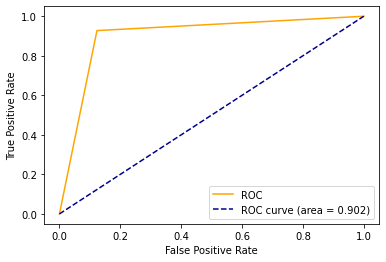

In [91]:
fpr, tpr, threshold = roc_curve(y,y_pred)
auc = roc_auc_score(y,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### from the above we get all the metrics of the currently trained model.
### put income column and predicted income column side by side to observe the diff between these two columns

In [93]:
x = newdf.drop(columns = ['Income'])
y_pred=rfmodel.predict(x)
newdf['Income_pred']=y_pred
newdf[['Income','Income_pred']]

,Income,Income_pred
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
49433,1,1
49434,1,1
49435,1,1
49436,1,1


In [123]:
newdf.Income.value_counts(),newdf.Income_pred.value_counts()

(0    24719
 1    24719
 Name: Income, dtype: int64,
 1    25973
 0    23465
 Name: Income_pred, dtype: int64)

In [106]:
print('Number of falsely predicted more income while it was actually less than 50k income',newdf.Income_pred.value_counts()[1]-24719)

Number of falsely predicted more income while it was actually less than 50k income 1254


Text(0.5, 1.0, 'Income less/equal wrt 50k  vs more than 50k')

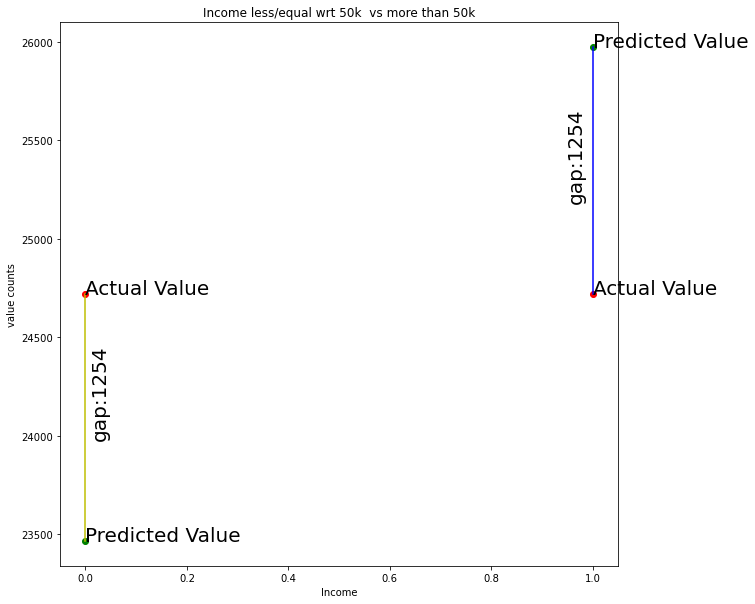

In [175]:
plt.figure(figsize=[10,10])
plt.scatter([0,1],[24719,24719],color='r')
plt.scatter([0,1],[23465,25973],color='g')
plt.plot([0,0],[23465,24719],color='y')
plt.plot([1,1],[25973,24719],color='b')
plt.text(0,24719,'Actual Value',fontsize=20)
plt.text(0,23465,'Predicted Value',fontsize=20)
plt.text(1,24719,'Actual Value',fontsize=20)
plt.text(1,25973,'Predicted Value',fontsize=20)
plt.text(0.01,24000,'gap:1254',fontsize=20,color='black',rotation='vertical')
plt.text(0.95,25200,'gap:1254',fontsize=20,color='black',rotation='vertical')
plt.xlabel("Income")
plt.ylabel('value counts')
plt.title('Income less/equal wrt 50k  vs more than 50k')

### analyze how similar dist plot are of actual and predicted values

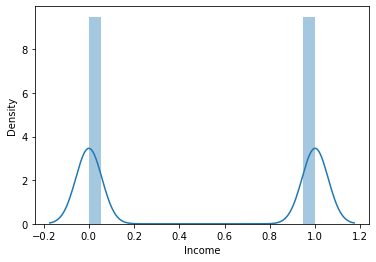

<AxesSubplot:xlabel='Income_pred', ylabel='Density'>

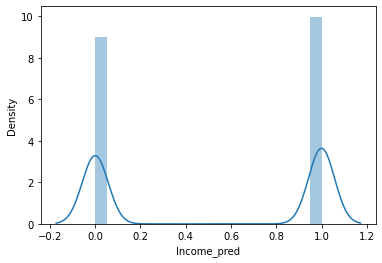

In [94]:
sn.distplot(newdf['Income'])
plt.show()
sn.distplot(newdf['Income_pred'])

### heatmap of the confusion matrix

<AxesSubplot:>

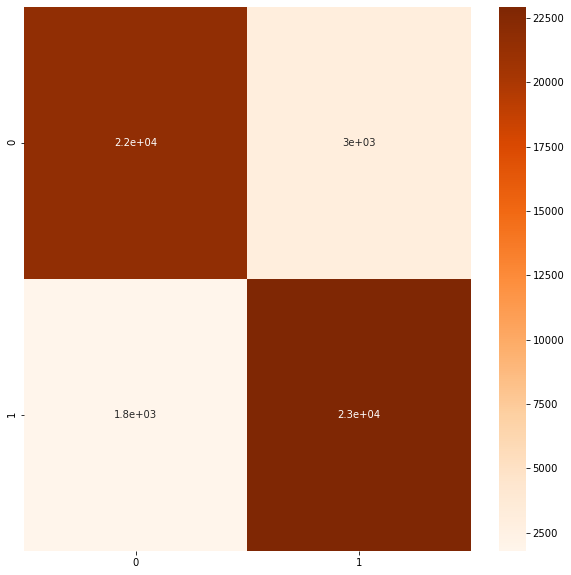

In [96]:
plt.figure(figsize=[10,10])
sn.heatmap(confusion_matrix(newdf['Income'],newdf['Income_pred']),annot=True,cmap="Oranges",xticklabels=model.classes_
               ,yticklabels=model.classes_)

In [97]:
confusion_matrix(newdf['Income'],newdf['Income_pred'])

array([[21671,  3048],
       [ 1794, 22925]], dtype=int64)

### 1794 false positive were detected
### 3048 true negative

### Save model

In [98]:
joblib.dump(rfmodel, 'census.pkl')

['census.pkl']